In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

# %matplotlib notebook
%matplotlib inline

# 3.1. - ПОЛИНОМИАЛЬНАЯ ИНТЕРПОЛЯЦИЯ

In [165]:
def Lagranz(list_f, list_x, x):
    result = 0
    pol_res = ''
    for i in range(len(list_f)):
        p1 = 1
        p2 = 1
        li = ''
        for j in range(len(list_x)):
            if i == j:
                p1 = p1 * 1;
                p2 = p2 * 1
            else:
                p1 = p1 * (x - list_x[j])
                li += f"{'*' if li else ''}(x {'-' if list_x[j] > 0 else '+'} {round(abs(list_x[j]), 4)})"
                p2 = p2 * (list_x[i] - list_x[j])
                
        if pol_res:
            pol_res += f"{'-' if p2*list_f[i] < 0 else '+'} {round(abs(list_f[i]), 4)}*{li}/{round(abs(p2), 4)} "
        else:
            pol_res = f"{'-' if p2*list_f[i] < 0 else ''}{round(abs(list_f[i]), 4)}*{li}/{round(abs(p2), 4)} "
        
        result = result + list_f[i] * p1 / p2
        
    polinom = pol_res
    return result, pol_res


def split_difference(list_f, list_x):
    result = [list_f]
    for i in range(0, len(list_f) - 1):
        local_result = []
        for j in range(len(result[i]) - 1):
            diff = (result[i][j] - result[i][j + 1]) / (list_x[j] - list_x[j + i + 1])
            local_result.append(diff)

        result.append(local_result)

    return result


def Newton(list_f, list_x, x):
    polinom = ''
    Pn = 0
    diff_list = split_difference(list_f, list_x)
    for i in range(len(diff_list)):
        x_mult = 1
        x_mult_str = ''
        for j in range(i):
            x_mult *= (x - list_x[j])
            x_mult_str += f"{'*' if x_mult_str else ''}(x {'-' if list_x[j] > 0 else '+'} {round(abs(list_x[j]), 4)})"
            
        Pn += x_mult * diff_list[i][0]
        if polinom:
            polinom += f"{'-' if diff_list[i][0] < 0 else '+'} {round(abs(diff_list[i][0]), 4)}*{x_mult_str} "
        else:
            polinom = f"{'-' if diff_list[i][0] < 0 else ''}{round(abs(diff_list[i][0]), 4)} "
            
    return Pn, polinom


def error_rate(f, Pn, x):
    return math.fabs(f(x) - Pn(x))

In [166]:
pi = math.pi  
y = lambda x: 1 / math.tan(x)

Xa = [i * pi / 8 for i in range(1, 5)]
Ya = [y(x) for x in Xa]
Xb = [pi / 8, 5 * pi / 16, 3 * pi / 8, pi / 2]
Yb = [y(x) for x in Xb]

X = pi / 3

In [167]:
_, polinom = Lagranz(Ya, Xa, X)
print('L(x) =', polinom)

print()

_, polinom = Newton(Ya, Xa, X)
print('N(x) =', polinom)

L(x) = -2.4142*(x - 0.7854)*(x - 1.1781)*(x - 1.5708)/0.3634 + 1.0*(x - 0.3927)*(x - 1.1781)*(x - 1.5708)/0.1211 - 0.4142*(x - 0.3927)*(x - 0.7854)*(x - 1.5708)/0.1211 + 0.0*(x - 0.3927)*(x - 0.7854)*(x - 1.1781)/0.3634 

N(x) = 2.4142 - 3.6013*(x - 0.3927) + 2.686*(x - 0.3927)*(x - 0.7854) - 1.8077*(x - 0.3927)*(x - 0.7854)*(x - 1.1781) 


In [168]:
L, polinom = Lagranz(Ya, Xa, X)
print('L(x) =', polinom)

print()

N, polinom = Newton(Ya, Xa, X)
print('N(x) =', polinom)

print()

print('F(x) =', y(X))
print()

print('Лагранж:', L, 'Погрешность:', error_rate(y, lambda x: L, X))
print('Ньютон:', N, 'Погрешность:', error_rate(y, lambda x: N, X))
# print()
# print(Lagrange(Yb, Xb, X), error_rate(y, lambda x: Lagrange(Yb, Xb, x), X))
# print(Newton(Yb, Xb, X), error_rate(y, lambda x: Newton(Yb, Xb, x), X))

L(x) = -2.4142*(x - 0.7854)*(x - 1.1781)*(x - 1.5708)/0.3634 + 1.0*(x - 0.3927)*(x - 1.1781)*(x - 1.5708)/0.1211 - 0.4142*(x - 0.3927)*(x - 0.7854)*(x - 1.5708)/0.1211 + 0.0*(x - 0.3927)*(x - 0.7854)*(x - 1.1781)/0.3634 

N(x) = 2.4142 - 3.6013*(x - 0.3927) + 2.686*(x - 0.3927)*(x - 0.7854) - 1.8077*(x - 0.3927)*(x - 0.7854)*(x - 1.1781) 

F(x) = 0.577350269189626

Лагранж: 0.5579748085542388 Погрешность: 0.0193754606353872
Ньютон: 0.5579748085542388 Погрешность: 0.0193754606353872


In [111]:
l = lambda x: -2.4142*(x - 0.7854)*(x - 1.1781)*(x - 1.5708)/0.3634 + 1.0*(x - 0.3927)*(x - 1.1781)*(x - 1.5708)/0.1211 - 0.4142*(x - 0.3927)*(x - 0.7854)*(x - 1.5708)/0.1211 + 0.0*(x - 0.3927)*(x - 0.7854)*(x - 1.1781)/0.3634 
print(l(X))

print()

n = lambda x:  2.4142 - 3.6013*(x - 0.3927) + 2.686*(x - 0.3927)*(x - 0.7854) - 1.8077*(x - 0.3927)*(x - 0.7854)*(x - 1.1781) 
print(n(X))


0.5580893500813493

0.5579389122974421


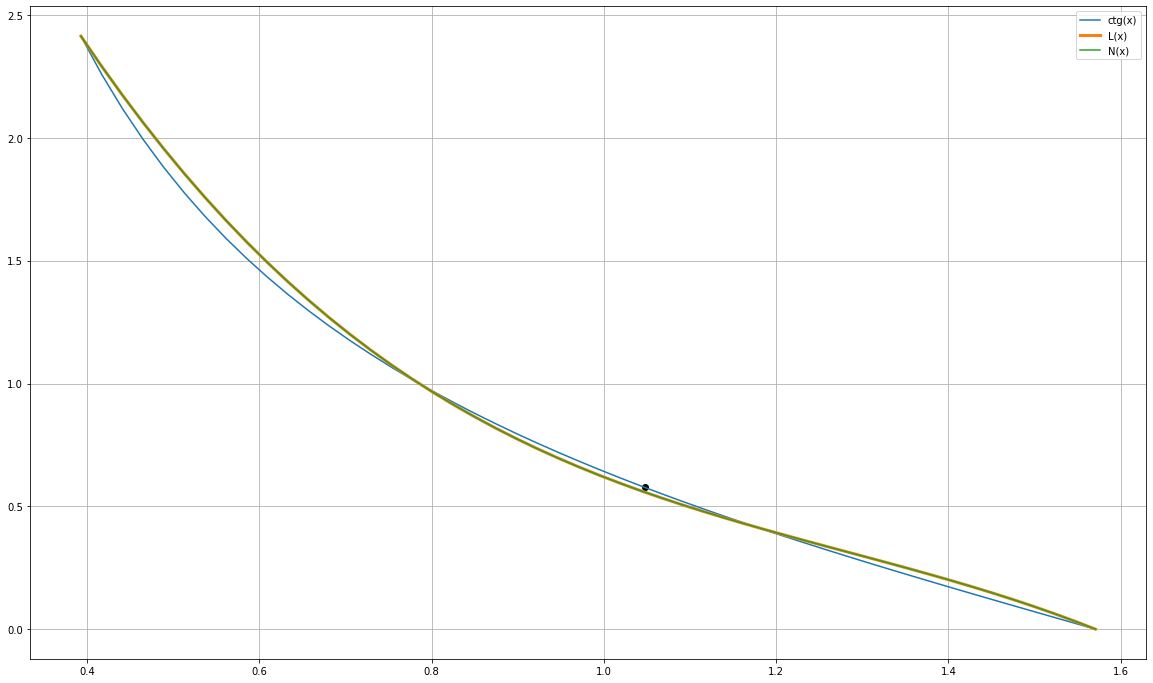

In [113]:
x = np.linspace(math.pi / 8, 4 * math.pi / 8)
y1 = [y(i) for i in x]
y2 = [Lagranz(Ya, Xa, i)[0] for i in x]
y3 = [Newton(Ya, Xa, i)[0] for i in x]
# y4 = [Lagrange(Yb, Xb, i) for i in x]
# y5 = [Newton(Yb, Xb, i) for i in x]


plt.figure(figsize=(20, 12))
plt.plot(x, y1, label='ctg(x)')
plt.plot(x, y2, label='L(x)', linewidth=3)
plt.plot(x, y3, label='N(x)')
# plt.plot(x, y4, label='LagrangeB')
# plt.plot(x, y5, label='NewtonB')
plt.scatter(X, y(X), color='black')
plt.legend()
plt.grid(True)

# 3.2. - СПЛАЙН - ИНТЕРПОЛЯЦИЯ

In [125]:
def Progonka(arr) -> list:
    A = [[arr[i][j] for j in range(len(arr[i]))] for i in range(len(arr))]
    n = len(A)

    #   Формирование массивов чисел a, b, c, d _____________
    #   a = [a0, a1, a2, ..., a_n]
    a, b, c, d = [0], [arr[0][0]], [arr[0][1]], [arr[0][2]]
    for i in arr[1:-1]:
        a.append(i[0])
        b.append(i[1])
        c.append(i[2])
        d.append(i[3])

    a.append(arr[-1][0])
    b.append(arr[-1][1])
    c.append(0)
    d.append(arr[-1][2])

    #     for i in range(n):
    #         if math.fabs(b[i]) < math.fabs(a[i]) + math.fabs(c[i]):
    #             raise Exception

    #   Формирование массивов P, Q (Расчет значений) ((Прямой ход))

    P, Q = [-c[0] / b[0]], [d[0] / b[0]]

    for i in range(1, n):
        P.append(-c[i] / (b[i] + a[i] * P[i - 1]))
        Q.append((d[i] - a[i] * Q[i - 1]) / (b[i] + a[i] * P[i - 1]))

    #   Вычисление решения системы (Обратный ход)
    x = [Q[n - 1]]
    for i in range(1, n):
        x.append(P[n - 1 - i] * x[i - 1] + Q[n - 1 - i])

    #     print('P:')
    #     print(np.array(P))
    #     print('Q:')
    #     print(np.array(Q))

    x = reversed(x)
    return x


def spline_interpolations(list_f: list, list_x: list, X, flag=False):
    n = len(list_f) - 1
    h = lambda i: list_x[i] - list_x[i - 1]

    c_slau = [[2 * (h(1) + h(2)), h(2), 3 * ((list_f[2] - list_f[1]) / h(2) - (list_f[1] - list_f[0]) / h(1))]]
    for i in range(3, n):
        equation = [h(i - 1), 2 * (h(i - 1) + h(i)), h(i),
                    3 * ((list_f[i] - list_f[i - 1]) / h(i) - (list_f[i - 1] - list_f[i - 2]) / h(i - 1))]
        c_slau.append(equation)

    equation = [h(n - 1), 2 * (h(n - 1) + h(n)),
                3 * ((list_f[n] - list_f[n - 1]) / h(n) - (list_f[n - 1] - list_f[n - 2]) / h(n - 1))]
    c_slau.append(equation)
    c = [0]
    c.extend(Progonka(c_slau))

    a = [i for i in list_f][:-1]

    b = [(list_f[i] - list_f[i - 1]) / h(i) - h(i) / 3 * (c[i] + 2 * c[i - 1]) for i in range(1, n)]
    b.append((list_f[n] - list_f[n - 1]) / (h(n)) - 2 * h(n) * c[n - 1] / 3)

    d = [(c[i] - c[i - 1]) / 3 / h(i) for i in range(1, n)]
    d.append(-c[n - 1] / 3 / h(n))

    #     print(len(a), len(b), len(c), len(d))

    q = 0
    for i in range(1, n + 1):
        if x[i - 1] <= X <= x[i]:
            q = i - 1

    #     print('a', 'b', 'c', 'd')
    if flag:
        print('A:', [round(j, 4) for j in a])
        print('B:', [round(j, 4) for j in b])
        print('C:', [round(j, 4) for j in c])
        print('D:', [round(j, 4) for j in d])
        print()
    
    polinom = f"{round(a[q], 4)} {'+' if b[q] > 0 else '-'} {round(abs(b[q]), 4)}*(x - {x[q]}) {'+' if c[q] > 0 else '-'} {round(abs(c[q]), 4)}*(x - {x[q]})\U000000B2 {'+' if d[q] > 0 else '-'} {round(abs(d[q]), 4)}*(x - {x[q]})\U000000B3"
    return a[q] + b[q] * (X - x[q]) + c[q] * (X - x[q]) ** 2 + d[q] * (X - x[q]) ** 3, (a[q], b[q], c[q], d[q]), polinom


In [127]:
X = 8 / 3
x = [1 + 0.9 * i for i in range(5)]
f = [2.4142, 1.0818, 0.50953, 0.11836, -0.24008]
# print(x, f, sep='\n')

# 0.724
# 0 0.23, -0.5 3.45
spl, coefs, polinom = spline_interpolations(f, x, X, flag=True)

print('spline(x) =', polinom)
print(f'spline({X}) =', spl)
# print('Коэфиценты в сплайне = ', coefs)


# q = lambda x: 1.0818 - 1.0554*(x - 1.9) + 0.7084*(x - 1.9)**2 - 0.2691*(x - 1.9)**3
# q(X)

A: [2.4142, 1.0818, 0.5095, 0.1184]
B: [-1.693, -1.0554, -0.4342, -0.4192]
C: [0, 0.7084, -0.0181, 0.0348]
D: [0.2624, -0.2691, 0.0196, -0.0129]

spline(x) = 1.0818 - 1.0554*(x - 1.9) + 0.7084*(x - 1.9)² - 0.2691*(x - 1.9)³
spline(2.6666666666666665) = 0.567741352944165


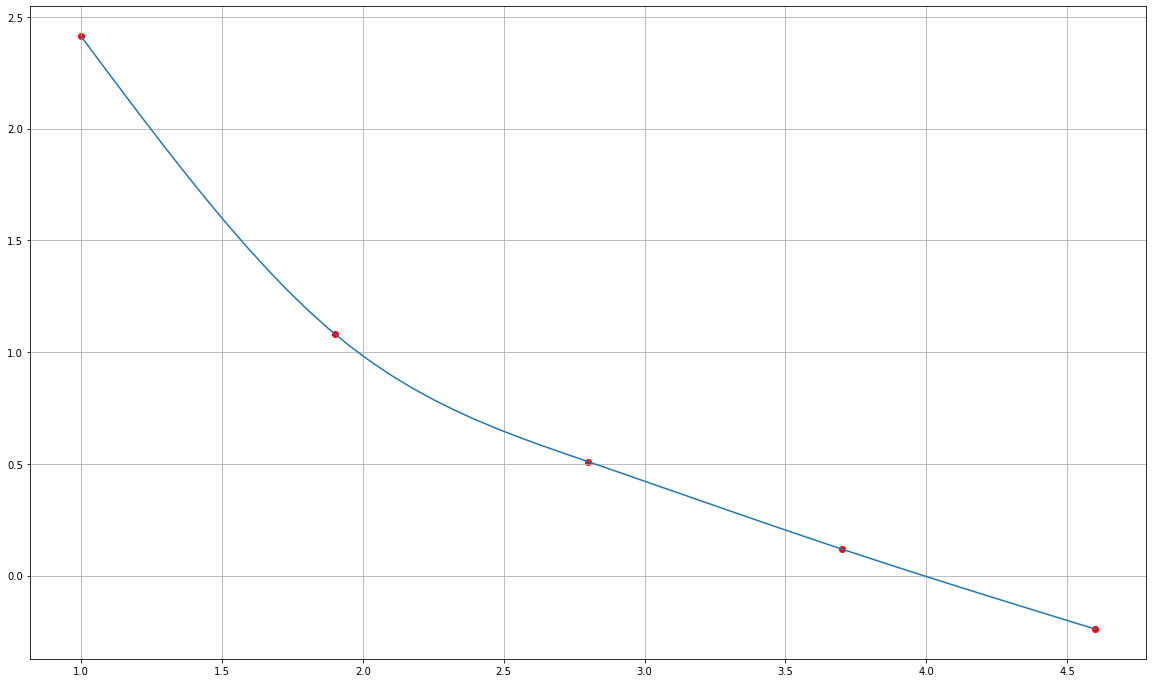

In [116]:
xi = np.linspace(1, 4.6)
y = [spline_interpolations(f, x, i)[0] for i in xi]

plt.figure(figsize=(20, 12))
plt.grid(True)
plt.plot(xi, y)
plt.scatter(x, f, color='r')
None

# 3.3. - МЕТОД НАИМЕНЬШИХ КВАДРАТОВ

In [129]:
def lu_dec(A):
    """
    Функция LU разложения матрицы
    :param A: Матрица, которую нужно разложить
    :return L, U: Мтарицы L, U
    """
    n = len(A)
    L = [[1 if i == j else 0 for i in range(n)] for j in range(n)]
    U = [[0 for i in range(n)] for j in range(n)]

    for i in range(n):
        for j in range(n):
            if i <= j:
                U[i][j] = A[i][j] - sum([L[i][k] * U[k][j] for k in range(i)])
            else:
                L[i][j] = (A[i][j] - sum([L[i][k] * U[k][j] for k in range(j)])) / U[j][j]

    return L, U


def decision(arr, b=None):
    """
    Решение СЛАУ методом LU разложения
    :param arr: A|B
    :return x:
    """
    n = len(arr)
    if b is None:
        A = [[arr[i][j] for j in range(len(arr[i]) - 1)] for i in range(len(arr))]
        b = [arr[i][len(A[0])] for i in range(n)]
    else:
        A = arr

    L, U = lu_dec(A)

    # L * y  = b
    y = [0 for i in range(n)]
    for i in range(n):
        y[i] = (b[i] - sum([L[i][k] * y[k] for k in range(i)]))

    x = [0 for i in range(n)]

    for i in range(n - 1, -1, -1):
        x[i] = round((y[i] - sum([U[i][k] * x[k] for k in range(i + 1, n)])) / U[i][i], 4)

    return x


def MNK(y, x, degree):
    A = []
    B = []
    n = len(x)

    for k in range(degree + 1):
        a = [sum([x[j] ** i for j in range(n)])
             for i in range(k, degree + k + 1)]
        b = sum([y[i] * (x[i] ** k) for i in range(n)])
        A.append(a)
        B.append(b)

    return decision(A, B)


In [135]:
def power_number(n_):
    if n_ == '0':
        return '\U00002070'
    elif n_ == '1':
        return '\U000000B9'
    elif n_ == '2':
        return '\U000000B2'
    elif n_ == '3':
        return '\U000000B3'
    elif n_ == '4':
        return '\U00002074'
    elif n_ == '5':
        return '\U00002075'
    elif n_ == '6':
        return '\U00002076'
    elif n_ == '7':
        return '\U00002077'
    elif n_ == '8':
        return '\U00002078'
    elif n_ == '9':
        return '\U00002079'

def power(__x):
    ans = ''
    __x = str(__x)
    for i in __x:
        ans += power_number(i)

    return ans


def print_polinom(coefs_, x='x'):
    if len(coefs_) == 1 and coefs_[0] == 0:
        return '0'
    polinom = ''
    n_ = len(coefs_)
    flag = True
    for coef in coefs_:
        n_ -= 1
        if coef == 0:
            continue
        if coef >= 0:
            if flag:
                flag = False
            else:
                polinom += '+'
        else:
            flag = False
            polinom += '-'

        if abs(coef) != 1 or n_ == 0:
            polinom += str(abs(coef))
        if n_ == 0:
            continue
        elif n_ == 1:
            polinom += x
        else:
            polinom += x + power(n_)

#     polinom += '\n'
    return polinom

a1: [2.5756, -0.6276]
F(x) = 2.5756x-0.6276
ERROR1: 0.47012212690000027

a2: [3.5472, -1.3978, 0.1185]
F(x) = 3.5472x²-1.3978x+0.1185
ERROR2: 0.1259531907749999

a5: [6.5156, -6.4827, 3.0741, -0.7904, 0.1029, -0.0054]
F(x) = 6.5156x⁵-6.4827x⁴+3.0741x³-0.7904x²+0.1029x-0.0054
ERROR5: 1.0412973319342346e-07


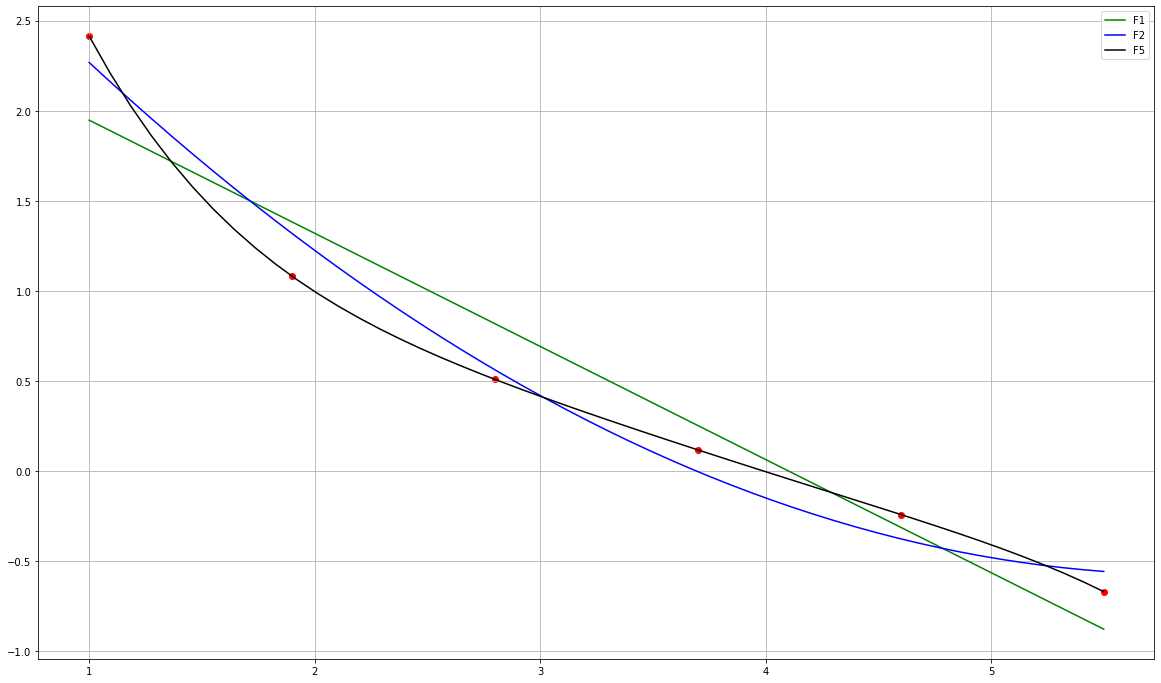

In [139]:
X = [0.9 * (i) + 1 for i in range(6)]
F = [2.4142, 1.0818, 0.50953, 0.11836, -0.24008, -0.66818]

a1 = MNK(F, X, 1)
f1 = lambda q: sum([a1[i] * (q ** i) for i in range(len(a1))])
ERROR1 = sum([(f1(X[i]) - F[i]) ** 2 for i in range(len(F))])
print('a1:', a1)
print('F(x) =', print_polinom(a1))
print('ERROR1:', ERROR1)

print()

a2 = MNK(F, X, 2)
f2 = lambda q: sum([a2[i] * (q ** i) for i in range(len(a2))])
ERROR2 = sum([(f2(X[i]) - F[i]) ** 2 for i in range(len(F))])
print('a2:', a2)
print('F(x) =', print_polinom(a2))
print('ERROR2:', ERROR2)

print()

# a3 = MNK(F, X, 3)
# f3 = lambda q: sum([a3[i] * (q ** i) for i in range(len(a3))])
# ERROR3 = sum([(f3(X[i]) - F[i]) ** 2 for i in range(len(F))])
# print('a3:', a3)
# print('ERROR3:', ERROR3)

# print()

a5 = MNK(F, X, 5)
f5 = lambda q: sum([a5[i] * (q ** i) for i in range(len(a5))])
ERROR5 = sum([(f5(X[i]) - F[i]) ** 2 for i in range(len(F))])
print('a5:', a5)
print('F(x) =', print_polinom(a5))
print('ERROR5:', ERROR5)

x1 = np.linspace(X[0], X[-1])
y1 = [f1(i) for i in x1]

x2 = np.linspace(X[0], X[-1])
y2 = [f2(i) for i in x2]

# x3 = np.linspace(X[0], X[-1])
# y3 = [f3(i) for i in x3]

x5 = np.linspace(X[0], X[-1])
y5 = [f5(i) for i in x5]

plt.figure(figsize=(20, 12))
plt.grid(True)
plt.plot(x1, y1, c='g', label='F1')
plt.plot(x2, y2, c='b', label='F2')
# plt.plot(x3, y3, c='purple', label='F3')
plt.plot(x5, y5, c='black', label='F5')
plt.scatter(X, F, color='r')
plt.legend()
None

# 3.4. - ЧИСЛЕННОЕ ДИФФЕРЕНЦИРОВАНИЕ

In [150]:
def der1(x, y, X):
    n = len(x)
    k = 0
    for i in range(n - 1):
        if x[i] <= X <= x[i + 1]:
            k = i
            break

#     print(k)

    diffy = lambda i: y[i + 1] - y[i]
    diffx = lambda i: x[i + 1] - x[i]

    return diffy(k) / diffx(k) + (diffy(k + 1) / diffx(k + 1) - diffy(k) / diffx(k)) / (x[k + 2] - x[i]) * (
                2 * X - x[k] - x[k + 1])


def der2(x, y, X):
    n = len(x)
    k = 0
    for i in range(n - 1):
        if x[i] <= X <= x[i + 1]:
            k = i
            break

#     print(k)

    diffy = lambda i: y[i + 1] - y[i]
    diffx = lambda i: x[i + 1] - x[i]

    return 2 * (diffy(k + 1) / diffx(k + 1) - diffy(k) / diffx(k)) / (x[k + 2] - x[i])

In [151]:
x = [0.0, 0.1, 0.2, 0.3, 0.4]
y = [1.0, 1.1052, 1.2214, 1.3499, 1.4918]

print("y'(x) =", der1(x, y, 0.2))
print("y\"(x) =", der2(x, y, 0.2))

y'(x) = 1.223500000000001
y"(x) = 1.23


# 3.5. - ЧИСЛЕННОЕ ИНТЕГРИРОВАНИЕ

In [152]:
y = lambda x: (3*x + 4)/(2*x + 7)
X0 = -2
Xk = 2
h1 = 1
h2 = 0.5

## Шаг h1

In [153]:
x = np.arange(X0, Xk + 0.1, h1)
Rect1 = h1 * sum([y((x[i] + x[i + 1]) / 2) for i in range(len(x) - 1)])
Trap1 = h1 * sum([y(x[i]) / 2 if i == 0 or i == len(x) - 1 else y(x[i]) for i in range(len(x))])
Simpson1 = h1 / 3 * sum([y(x[i]) if i == 0 or i == len(x) - 1 else y(x[i]) * (2 ** (i % 2 + 1)) for i in range(len(x))])
print('Прямоугольник:', Rect1)
print('Трапеция:', Trap1)
print('Симпсон:', Simpson1)

Прямоугольник: 1.8291666666666666
Трапеция: 1.6704184704184706
Симпсон: 1.7654641654641656


## Шаг h2

In [154]:
x = np.arange(X0, Xk + 0.1, h2)
Rect2 = h2 * sum([y((x[i] + x[i + 1]) / 2) for i in range(len(x) - 1)])
Trap2 = h2 * sum([y(x[i]) / 2 if i == 0 or i == len(x) - 1 else y(x[i]) for i in range(len(x))])
Simpson2 = h2 / 3 * sum([y(x[i]) if i == 0 or i == len(x) - 1 else y(x[i]) * (2 ** (i % 2 + 1)) for i in range(len(x))])
print('Прямоугольник:', Rect2)
print('Трапеция:', Trap2)
print('Симпсон:', Simpson2)

Прямоугольник: 1.7909819111057501
Трапеция: 1.7497925685425686
Симпсон: 1.776250601250601


## Оценка погрешности с помощью метода Рунге-Ромберга-Ричардсона

In [161]:
def RungeRombergRichardson(Fh, Fkh):
    return Fh + (Fh - Fkh) / (0.5 * 0.5 - 1)

In [162]:
exact_solution = 1.77733
print('Прямоугольник:', RungeRombergRichardson(Rect1, Rect2), 'Погрешность:',
      abs(exact_solution - RungeRombergRichardson(Rect1, Rect2)))
print('Трапеция:', RungeRombergRichardson(Trap1, Trap2), 'Погрешность:',
      abs(exact_solution - RungeRombergRichardson(Trap1, Trap2)))
print('Симпсон:', RungeRombergRichardson(Simpson1, Simpson2), 'Погрешность:',
      abs(exact_solution - RungeRombergRichardson(Simpson1, Simpson2)))

Прямоугольник: 1.7782536592521112 Погрешность: 0.0009236592521111309
Трапеция: 1.7762506012506012 Погрешность: 0.0010793987493988855
Симпсон: 1.7798460798460793 Погрешность: 0.0025160798460792666
